In [16]:
import torch
import torch.nn as nn 
import torchvision as tv 
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from tqdm import tqdm

import pandas as pd

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
train_mnist = pd.read_csv('/content/drive/MyDrive/train_mnist.csv')

In [19]:
!pip3 install more_itertools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
from more_itertools import batched

train_mnist_formed = []
for i, row in train_mnist.iterrows():
    row = row.tolist()
    label = row[0]
    image = row[1:]
    

    total_image = []
    batches_image = np.array_split(image , 28)
    
    for i in batches_image :
      total_image.append(i)

    
    
    total_image = np.expand_dims( total_image , axis = 0 )
    total_image = torch.FloatTensor(total_image)
    image_w_label = ( total_image , label )
    train_mnist_formed.append(image_w_label)
    

In [ ]:
# image - tensor , label - int or numpy

In [71]:
ds_mnist = train_mnist_formed

In [72]:
ds_mnist[0][0].shape


torch.Size([1, 28, 28])

In [73]:
len(ds_mnist)

42000

In [145]:
ds_mnist[0][0]

tensor([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 188., 255.,
           94.,   0.,   0.,   0.,   0.,   0.],
     

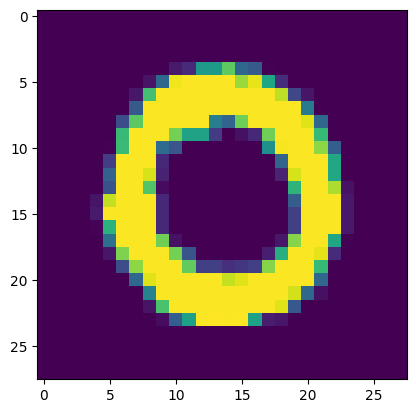

In [74]:
plt.imshow( ds_mnist[1][0].squeeze() )

In [146]:
batch_size = 16

dataloader = torch.utils.data.DataLoader(ds_mnist ,
                                         batch_size = batch_size ,
                                         shuffle = True , 
                                         num_workers= 0 , 
                                         drop_last = True 
                                         )
# num workers - количество парралельный потоков , 0 - все
# Drop Last не дает генерировать маленькие датасеты (??)


Функция активации добавляет нелинейности

In [107]:
class Neural_numbers(nn.Module):
  #Arch и ее блоки
  def __init__(self):
        # импортим свойства nn.Module
        super().__init__() 
        
        self.flat = nn.Flatten()
        self.linear1 = nn.Linear(28*28 , 512)
        self.linear2 = nn.Linear(512 , 256)
        self.linear3 = nn.Linear(256 , 128)
        self.linear4 = nn.Linear(128, 64)
        self.linear5 = nn.Linear(64 , 128)
        self.linear6 = nn.Linear( 128 , 128)
        self.linear7 = nn.Linear( 128 , 10 )

        self.act = nn.LeakyReLU()
        
       # self.model = nn.Sequential( linear1 , act , linear2)
   # как будут перемещаться тензоры в нейронной сети      
  def forward(self, x): # x - tensor 
    out = self.flat(x)
    out = self.linear1(out)
    out = self.act(out)
    out = self.linear2(out)
    out = self.act(out)
    out = self.linear3(out)
    out = self.act(out)
    out = self.linear4(out)
    out = self.act(out)
    out = self.linear5(out)
    out = self.act(out)
    out = self.linear6(out)
    out = self.act(out)
    out = self.linear7(out)

    return out
        

        

In [108]:
model = Neural_numbers()

In [113]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW( model.parameters(), lr= 3e-4 , amsgrad = True  )

In [110]:
def accuracy(pred , label) :
    
    answer = F.softmax(pred.detach()).numpy().argmax(1)  == label.numpy().argmax(1)
    
    return answer.mean()

In [111]:
for img , label in dataloader :
  print(img)
  break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [147]:
epochs = 10 

for epoch in range(epochs):

  loss_val = 0 
  acc_val = 0 

  for img , label in (pbar := tqdm(dataloader)) : # просто запомнить визуализация
    optimizer.zero_grad() #  Обнови градиенты (в нуль их так как новые будем считать, чтобы они не наслаивались)
    label = nn.functional.one_hot( label , 10 ).float() # 1 - > [ 1, 0 ... 0 ]
    pred = model(img) # vector вероятностей [ 0 , 0 , 0 , 1 ... 0 ] для тройки

    loss = loss_fn(pred , label) # мы сделали pred & label одного вида чтобы их сравнить


    loss.backward() # считает градиенты

    loss_item = loss.item()
    loss_val += loss_item

    acc_current = accuracy(pred , label)
    acc_val  += acc_current
    optimizer.step() # шагаем оптимайзером , считаем веса 

  
   # .4 - 4 знака после запятой .4f - norm forma , .4e - nauchnaya forma 
    pbar.set_description(f'loss : {loss_item:.4f}\taccuracy : {acc_current:.3f}')  # ПРОСТО ЗАПОМНИТЬ прогресс лосса 
  print( f'epoch {epoch + 1 }' , f' loss_val : {loss_val / len(dataloader) }'
  , f'acc_val : {acc_val / len(dataloader)}')

  0%|          | 0/2625 [00:00<?, ?it/s]<ipython-input-110-758b855bc9b3>:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).numpy().argmax(1)  == label.numpy().argmax(1)
loss : 0.0001	accuracy : 1.000: 100%|██████████| 2625/2625 [00:31<00:00, 84.62it/s]


epoch 1  loss_val : 0.01308094588504773 acc_val : 0.9960952380952381


loss : 0.0026	accuracy : 1.000: 100%|██████████| 2625/2625 [00:31<00:00, 84.06it/s]


epoch 2  loss_val : 0.013262423546894487 acc_val : 0.9962142857142857


loss : 0.0042	accuracy : 1.000: 100%|██████████| 2625/2625 [00:31<00:00, 83.73it/s]


epoch 3  loss_val : 0.008384431895924449 acc_val : 0.9976190476190476


loss : 0.0000	accuracy : 1.000: 100%|██████████| 2625/2625 [00:30<00:00, 84.83it/s]


epoch 4  loss_val : 0.005969640472309952 acc_val : 0.9983333333333333


loss : 0.0088	accuracy : 1.000: 100%|██████████| 2625/2625 [00:31<00:00, 83.51it/s]


epoch 5  loss_val : 0.007810818678633353 acc_val : 0.9977380952380952


loss : 0.0005	accuracy : 1.000: 100%|██████████| 2625/2625 [00:31<00:00, 84.25it/s]


epoch 6  loss_val : 0.00619082169554804 acc_val : 0.9983571428571428


loss : 0.0009	accuracy : 1.000: 100%|██████████| 2625/2625 [00:31<00:00, 82.90it/s]


epoch 7  loss_val : 0.0036924606011524744 acc_val : 0.9988095238095238


loss : 0.0002	accuracy : 1.000: 100%|██████████| 2625/2625 [00:31<00:00, 84.26it/s]


epoch 8  loss_val : 0.005449515494066822 acc_val : 0.9984761904761905


loss : 0.0000	accuracy : 1.000: 100%|██████████| 2625/2625 [00:31<00:00, 83.75it/s]


epoch 9  loss_val : 0.006690537485368882 acc_val : 0.9982380952380953


loss : 0.0011	accuracy : 1.000: 100%|██████████| 2625/2625 [00:31<00:00, 83.81it/s]

epoch 10  loss_val : 0.0038252795361295028 acc_val : 0.9989285714285714


In [ ]:
# сколько параметров у модели / веса 

def count_parameters(model):
  return sum( p.numel() for p in model.parameters() if p.requires_grad ) 


In [ ]:
count_parameters(model)

79510

In [ ]:
# score func with print

def accuracy_winfo(pred , label) :
    print(pred) #  каждая отд предсказ в батче [  1.7303,  -0.8463,   1.5196,  -0.1102,  -4.0838,   6.4148,   0.0319, -2.1025,   2.8522,  -2.0271]
    print(pred.shape) # 16 x 10 предсказания одного батча 
    print(F.softmax(pred.detach())) # act func 
    print(F.softmax(pred.detach()).argmax(1) ) # в каждой из 16 выбирается наибольшее [5, 8, 4, 9, 1, 2, 6, 0, 1, 6, 1, 2, 7, 7, 2, 9]
    print(label)
    print(label.argmax(1))
    answer = F.softmax(pred.detach()).argmax(1)  == label.argmax(1)
    print(answer.sum())
    return answer.sum()

label vs label + argmax

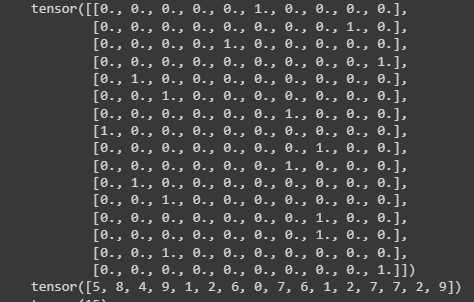

In [ ]:
accuracy_winfo(pred , label)

tensor([[  1.7303,  -0.8463,   1.5196,  -0.1102,  -4.0838,   6.4148,   0.0319,
          -2.1025,   2.8522,  -2.0271],
        [  2.9952,  -2.6888,   0.9804,   0.6225,  -1.4303,  -1.0281,  -0.2374,
          -4.3710,   7.5960,  -0.3884],
        [  2.0542, -12.2870,  -3.4906,  -8.3447,  12.1696,  -1.0493,   3.7555,
           2.8799,  -1.3387,   6.0152],
        [  0.3813,  -6.7387,  -3.3074,   0.6251,   4.2898,  -1.4121,  -9.8925,
           7.2414,   0.9062,  11.3215],
        [ -0.0574,   8.8402,   0.3458,  -2.3873,  -2.7128,  -0.0928,   0.7912,
           0.8383,   2.5349,  -3.1822],
        [ -0.7725,  -0.0462,  14.8153,   3.6123,  -5.0389,  -0.1032,  -6.3916,
           3.4223,   1.5333,  -7.0453],
        [ -2.8330,  -1.2340,   0.4791,  -1.6846,   0.4104,   0.4857,  10.1592,
          -2.5872,   3.3716,  -6.5307],
        [ 10.4648,  -4.5140,   0.0227,  -5.0681,  -2.4346,   1.8060,   1.1804,
           0.3683,  -2.7857,   1.5972],
        [ -1.6718,   3.5787,   3.5531,   1.2932,

<ipython-input-75-3341f8423127>:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(pred.detach())) # act func
<ipython-input-75-3341f8423127>:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(pred.detach()).argmax(1) ) # в каждой из 16 выбирается наибольшее [5, 8, 4, 9, 1, 2, 6, 0, 1, 6, 1, 2, 7, 7, 2, 9]
<ipython-input-75-3341f8423127>:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).argmax(1)  == label.argmax(1)


tensor(15)

In [ ]:
accuracy(pred , label) # 15 out of 16

<ipython-input-87-758b855bc9b3>:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).numpy().argmax(1)  == label.numpy().argmax(1)


0.9375

In [ ]:
img = cv2.imread('jannapicture.png' , cv2.IMREAD_GRAYSCALE )
img = np.expand_dims( img, axis = 0 )
img = np.expand_dims( img, axis = 0 )
img = img.astype(np.float32) / 255.0

In [ ]:
img.shape

(1, 1, 28, 28)

In [ ]:
t_img = torch.from_numpy(img)

nash_pred = model(t_img)

In [ ]:
nash_pred

tensor([[ -2.3091, -14.5147,   1.0089,   6.5867,  -1.4685,  11.6470,   2.9361,
         -15.1854,  17.0669,  -2.4273]], grad_fn=<AddmmBackward0>)

In [ ]:
F.softmax(nash_pred).detach().numpy()

<ipython-input-106-37a0ce516137>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(nash_pred).detach().numpy()


array([[3.8300616e-09, 1.9159164e-14, 1.0572623e-07, 2.7963883e-05,
        8.8767544e-09, 4.4079917e-03, 7.2636340e-07, 9.7968042e-15,
        9.9556327e-01, 3.4027867e-09]], dtype=float32)

In [ ]:
F.softmax(nash_pred.detach()).numpy().argmax(1)

<ipython-input-107-d39544e4ce3b>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(nash_pred.detach()).numpy().argmax(1)


array([8])

In [148]:
test_mnist = pd.read_csv('/content/drive/MyDrive/test_mnist.csv')

In [149]:
test_mnist

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
test_mnist_formed = []
for i, row in test_mnist.iterrows():
    row = row.tolist()
    
    
    

    total_image = []
    batches_image = np.array_split(row , 28)
    
    for i in batches_image :
      total_image.append(i)

    
    
    total_image = np.expand_dims( total_image , axis = 0 )
    total_image = torch.FloatTensor(total_image)
    
    test_mnist_formed.append(total_image)

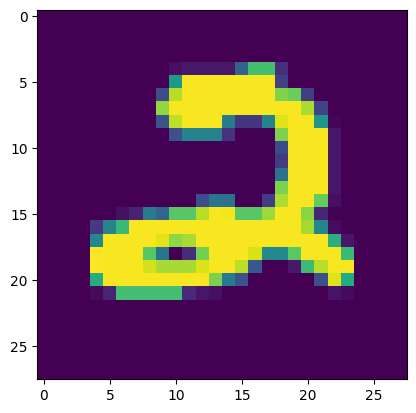

In [151]:
plt.imshow( test_mnist_formed[0][0])

In [152]:

list_of_predictions = []

for i in test_mnist_formed :
  
  
  
  nash_pred = model(i)

  prediction = F.softmax(nash_pred.detach()).numpy().argmax(1)
  prediction = prediction[0]
  
  list_of_predictions.append(prediction)

  
  




<ipython-input-152-ff4eeed2e85c>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prediction = F.softmax(nash_pred.detach()).numpy().argmax(1)


In [153]:
len(list_of_predictions)

28000

In [154]:
list_of_indixes = [ i for i in range(1 , 28001)]

In [155]:
len(list_of_indixes)

28000

In [156]:
submission = pd.DataFrame({'ImageId' : list_of_indixes , 'Label' : list_of_predictions })

In [157]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [158]:
submission.to_csv( 'subm1.csv' , index= False )